In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/pit/lang/mutations.csv', error_bad_lines=False, names = ["Class", "Package", "gc1", "gc2","gc3","Coverage","gc4"])

In [27]:
df.head()

,Class,Package,gc1,gc2,gc3,Coverage,gc4
0,ArrayUtils.java,org.apache.commons.lang3.ArrayUtils,org.pitest.mutationtest.engine.gregor.mutators...,add,5951,KILLED,org.apache.commons.lang3.ArrayUtilsAddTest.tes...
1,ArrayUtils.java,org.apache.commons.lang3.ArrayUtils,org.pitest.mutationtest.engine.gregor.mutators...,add,5951,KILLED,org.apache.commons.lang3.ArrayUtilsAddTest.tes...
2,ArrayUtils.java,org.apache.commons.lang3.ArrayUtils,org.pitest.mutationtest.engine.gregor.mutators...,add,5957,SURVIVED,none
3,ArrayUtils.java,org.apache.commons.lang3.ArrayUtils,org.pitest.mutationtest.engine.gregor.mutators...,add,5954,KILLED,org.apache.commons.lang3.ArrayUtilsAddTest.tes...
4,ArrayUtils.java,org.apache.commons.lang3.ArrayUtils,org.pitest.mutationtest.engine.gregor.mutators...,add,5958,KILLED,org.apache.commons.lang3.ArrayUtilsAddTest.tes...


In [28]:
df.drop('gc1', axis=1, inplace=True)
df.drop('gc2', axis=1, inplace=True)
df.drop('gc3', axis=1, inplace=True)
df.drop('gc4', axis=1, inplace=True)
df['Package'] = df['Package'].map(lambda x: str(x)[:x.rfind('.')])
df['Package'] = df['Package'].map(lambda x:  x if (x.find('$')+1 == 0) else  x[:x.find('$')+1] )
df['Class'] = df['Class'].map(lambda x: str(x)[:x.rfind('.java')])
df.rename(columns={'Class':'CLASS',
                          'Package':'PACKAGE'},
                 inplace=True)
df.head()


,CLASS,PACKAGE,Coverage
0,ArrayUtils,org.apache.commons.lang3,KILLED
1,ArrayUtils,org.apache.commons.lang3,KILLED
2,ArrayUtils,org.apache.commons.lang3,SURVIVED
3,ArrayUtils,org.apache.commons.lang3,KILLED
4,ArrayUtils,org.apache.commons.lang3,KILLED


In [29]:
df = df.groupby(['CLASS','PACKAGE','Coverage'],as_index = False).size().unstack(fill_value=0)
df.head()

,Coverage,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT
CLASS,PACKAGE,,,,,
AbstractCircuitBreaker,org.apache.commons.lang3.concurrent,14,0,0,0,0
AggregateTranslator,org.apache.commons.lang3.text.translate,3,0,0,0,0
AnnotationUtils,org.apache.commons.lang3,90,0,4,11,0
ArchUtils,org.apache.commons.lang3,9,0,1,0,0
ArrayUtils,org.apache.commons.lang3,1770,0,16,275,61


In [30]:
#Not MEMORY_ERROR
df['Total_Mutant'] =  (df['KILLED'] + df['NO_COVERAGE'] + df['SURVIVED'] + df['TIMED_OUT'])
df['Mutation_Score'] =  ((df['KILLED']+df['TIMED_OUT']) / df['Total_Mutant'])*100
print('Total Mutants  '+str(df.Total_Mutant.sum()))


Total Mutants  13050


In [31]:
print('Total Killed  '+str(df.KILLED.sum()+df.TIMED_OUT.sum()))

Total Killed  11279


In [32]:
print('Total TIMED_OUT  '+str(df.TIMED_OUT.sum()))

Total TIMED_OUT  205


In [33]:
print('Mutation Score  '+str((df.KILLED.sum()/df.Total_Mutant.sum())*100))
#df.reset_index()
#df.columns.tolist()

Mutation Score  84.85823754789273


In [34]:
df.to_csv('data.csv')
from google.colab import files
#files.download("data.csv")
df = pd.read_csv('data.csv', error_bad_lines=False)
df.head()


,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score
0,AbstractCircuitBreaker,org.apache.commons.lang3.concurrent,14,0,0,0,0,14,100.000000
1,AggregateTranslator,org.apache.commons.lang3.text.translate,3,0,0,0,0,3,100.000000
2,AnnotationUtils,org.apache.commons.lang3,90,0,4,11,0,105,85.714286
3,ArchUtils,org.apache.commons.lang3,9,0,1,0,0,10,90.000000
4,ArrayUtils,org.apache.commons.lang3,1770,0,16,275,61,2122,86.286522


In [35]:
df.count()

CLASS             119
PACKAGE           119
KILLED            119
MEMORY_ERROR      119
NO_COVERAGE       119
SURVIVED          119
TIMED_OUT         119
Total_Mutant      119
Mutation_Score    119
dtype: int64

In [36]:
df1 = pd.read_csv('https://raw.githubusercontent.com/niravjdn/Software-Measurement-Project/master/data/jacoco/lang/jacoco/jacoco.csv', error_bad_lines=False)
df1['CLASS'] = df1['CLASS'].map(lambda x:  x if (x.find('.')+1 == 0) else  x[:x.find('.')] )
#aggregation_functions = {'price': 'sum', 'amount': 'sum', 'name': 'first'}
df1 = df1.groupby(df1['CLASS']).aggregate(sum).reset_index()
#df1.count()
df1.columns
#df1.head()

Index(['CLASS', 'INSTRUCTION_MISSED', 'INSTRUCTION_COVERED', 'BRANCH_MISSED',
       'BRANCH_COVERED', 'LINE_MISSED', 'LINE_COVERED', 'COMPLEXITY_MISSED',
       'COMPLEXITY_COVERED', 'METHOD_MISSED', 'METHOD_COVERED'],
      dtype='object')

In [0]:
df1['Statement_Percentage'] =  (df1['LINE_COVERED'] / (df1['LINE_COVERED'] + df1['LINE_MISSED'])) * 100

In [0]:
df1['Branch_Percentage'] =  (df1['BRANCH_COVERED'] / (df1['BRANCH_COVERED'] + df1['BRANCH_MISSED'])) * 100

In [39]:
df1['CC'] =  df1['COMPLEXITY_COVERED'] + df1['COMPLEXITY_MISSED'];
df1.CLASS.count()

125

In [40]:
merged_inner = pd.merge(left=df,right=df1, left_on='CLASS', right_on='CLASS')
merged_inner.CLASS.count()

119

In [41]:
df1[(~df1.CLASS.isin(merged_inner.CLASS))&(~df1.CLASS.isin(merged_inner.CLASS))]

,CLASS,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
19,CircuitBreakingException,0,16,0,0,0,8,0,4,0,4,100.000000,NaN,4
22,CloneFailedException,0,13,0,0,0,6,0,3,0,3,100.000000,NaN,3
26,ConcurrentException,3,11,0,0,2,4,1,2,1,2,66.666667,NaN,3
27,ConcurrentRuntimeException,0,14,0,0,0,6,0,3,0,3,100.000000,NaN,3
99,SerializationException,0,16,0,0,0,8,0,4,0,4,100.000000,NaN,4
113,TimeZones,3,0,0,0,2,0,1,0,1,0,0.000000,NaN,1


Difference - Classes not covered in jacoco or PIT

In [42]:
df = merged_inner
df.columns
merged_inner.head()

,CLASS,PACKAGE,KILLED,MEMORY_ERROR,NO_COVERAGE,SURVIVED,TIMED_OUT,Total_Mutant,Mutation_Score,INSTRUCTION_MISSED,INSTRUCTION_COVERED,BRANCH_MISSED,BRANCH_COVERED,LINE_MISSED,LINE_COVERED,COMPLEXITY_MISSED,COMPLEXITY_COVERED,METHOD_MISSED,METHOD_COVERED,Statement_Percentage,Branch_Percentage,CC
0,AbstractCircuitBreaker,org.apache.commons.lang3.concurrent,14,0,0,0,0,14,100.000000,5,134,0,8,0,26,1,20,1,16,100.000000,100.000000,21
1,AggregateTranslator,org.apache.commons.lang3.text.translate,3,0,0,0,0,3,100.000000,0,37,0,4,0,8,0,4,0,2,100.000000,100.000000,4
2,AnnotationUtils,org.apache.commons.lang3,90,0,4,11,0,105,85.714286,49,534,12,88,16,117,13,51,1,13,87.969925,88.000000,64
3,ArchUtils,org.apache.commons.lang3,9,0,1,0,0,10,90.000000,19,210,1,3,3,35,3,12,2,11,92.105263,75.000000,15
4,ArrayUtils,org.apache.commons.lang3,1770,0,16,275,61,2122,86.286522,113,8229,95,1459,48,2027,101,999,9,314,97.686747,93.886744,1100


In [43]:
merged_inner.count()

CLASS                   119
PACKAGE                 119
KILLED                  119
MEMORY_ERROR            119
NO_COVERAGE             119
SURVIVED                119
TIMED_OUT               119
Total_Mutant            119
Mutation_Score          119
INSTRUCTION_MISSED      119
INSTRUCTION_COVERED     119
BRANCH_MISSED           119
BRANCH_COVERED          119
LINE_MISSED             119
LINE_COVERED            119
COMPLEXITY_MISSED       119
COMPLEXITY_COVERED      119
METHOD_MISSED           119
METHOD_COVERED          119
Statement_Percentage    119
Branch_Percentage       107
CC                      119
dtype: int64

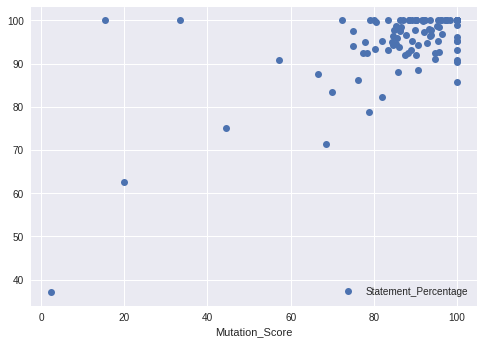

In [44]:
df.plot(x='Mutation_Score', y='Statement_Percentage', style='o')

In [45]:
df[['Mutation_Score','Statement_Percentage']].corr(method ='spearman')

,Mutation_Score,Statement_Percentage
Mutation_Score,1.000000,0.501829
Statement_Percentage,0.501829,1.000000


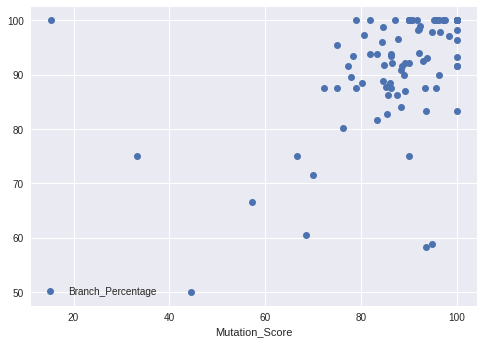

In [46]:
df.plot(x='Mutation_Score', y='Branch_Percentage', style='o')

In [47]:
df[['Mutation_Score','Branch_Percentage']].corr(method ='spearman')

,Mutation_Score,Branch_Percentage
Mutation_Score,1.000000,0.596976
Branch_Percentage,0.596976,1.000000


In [0]:
df.to_csv('lang-mu-st-branch.csv')
from google.colab import files
files.download("lang-mu-st-branch.csv")